# IMDB_Movies_EDA

#### Project Description

The project in the basic analysis of dataset which shows the basic information about the top movies as per IMDB which is  a movie rating platform. The project unveils the various aspects of the movies, its cast, director, its gross and profit etc

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian            
import pandas as pd                 #Used for cleaning and making basic analysis of the data
import numpy as np                  #Used for mathematical and statistical analysis
import seaborn as sns               #Used for plotting charts and graphs
import matplotlib.pyplot as plt     #Used for plotting charts and graphs

### Importing and Loading dataset

In [3]:
df= pd.read_csv('imdb_top_1000.csv')

In [4]:
#Making copy of dataset so as to maintain integrity of original dataset
movies_df= df.copy()

### Performing Data Prepration and cleaning

In [5]:
movies_df.shape

(1000, 16)

The Dataset have 1000 rows and 16 column 

In [6]:
movies_df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [20]:
#Finding the basic statistics of the numerical columns
movies_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,714.0,7.937115,0.293278,7.6,7.70,7.9,8.10,9.3
Meta_score,714.0,77.158263,12.401144,28.0,70.00,78.0,86.00,100.0
No_of_Votes,714.0,356134.823529,353901.127505,25229.0,96009.75,236602.5,507792.25,2343110.0


In [8]:
# Deleting the columns which are not of our use
movies_df.drop(['Poster_Link'], axis=1, inplace=True)

In [9]:
movies_df.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [10]:
#checking the null value and percent of null value in each column 
null = movies_df.isnull().sum()
nullpercent = (movies_df.isnull().sum()/len(movies_df))*100
null_values = pd.DataFrame({'null_values':null,'null_percent':nullpercent})
null_values

,null_values,null_percent
Series_Title,0,0.0
Released_Year,0,0.0
Certificate,101,10.1
Runtime,0,0.0
Genre,0,0.0
IMDB_Rating,0,0.0
Overview,0,0.0
Meta_score,157,15.7
Director,0,0.0
Star1,0,0.0


In [11]:
#Dropping all the null values from the dataset
movies_df.dropna(axis=0, inplace=True)

In [12]:
#Checking for duplicated values
movies_df[movies_df.duplicated()]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


No column in the dataset is duplicated

### Exploratory Analysis and Visualization

In [13]:
movies_df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#### Q1- Which are the top 10 Grossing Series

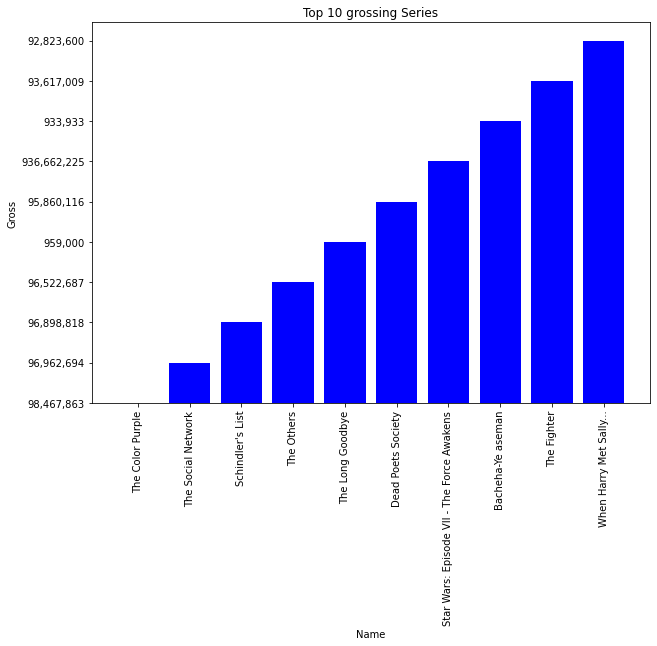

In [14]:
#Computing the top 10 most grossing movie and representing it by a bar chart
Top10 = movies_df.groupby('Series_Title')[['Gross']].sum().sort_values('Gross', ascending=False).head(10)

plt.figure(figsize=(10,7))
plt.bar(Top10.index, Top10['Gross'], color='blue')
plt.title('Top 10 grossing Series')
plt.xlabel('Name')
plt.ylabel('Gross')
plt.xticks(rotation=90);

#### Q2- Which are the least 10 grossing series

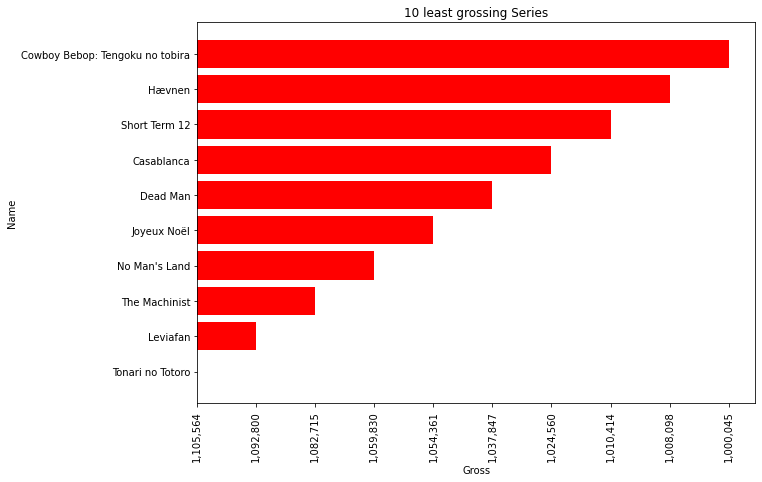

In [15]:
#Computing the least 10  grossing movie and representing it by a bar chart
bottom10 = movies_df.groupby('Series_Title')[['Gross']].sum().sort_values('Gross', ascending=False).tail(10)

plt.figure(figsize=(10,7))
plt.barh(bottom10.index, bottom10['Gross'], color='Red')
plt.title('10 least grossing Series')
plt.xlabel('Gross')
plt.ylabel('Name')
plt.xticks(rotation=90);

#### Q3- Is there any relation between years and Movie duration

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

  warnings.warn(


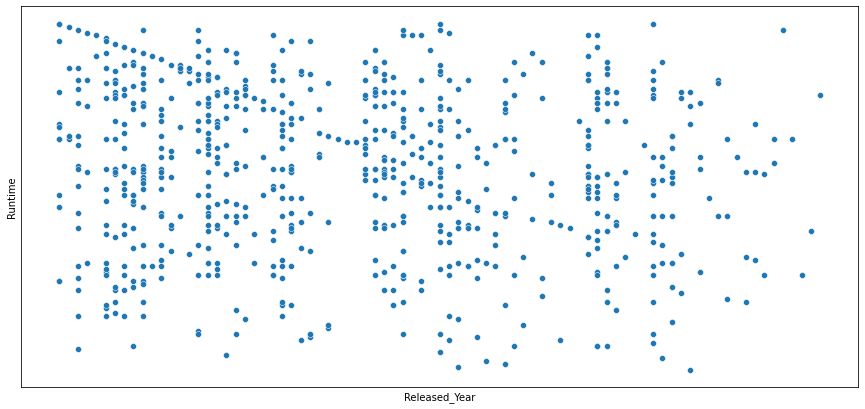

In [16]:
#Checking that if there is any relation between released_year and Runtime
plt.figure(figsize=(15,7))
sns.scatterplot('Released_Year', 'Runtime',data=movies_df)
plt.xticks(rotation=90)
plt.xticks([])
plt.yticks([]);

No there is no relation between Runtime and Released_Year

In [21]:
movies_df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#### Q-4 which director have directed what number of movies [Top 20 Directors]

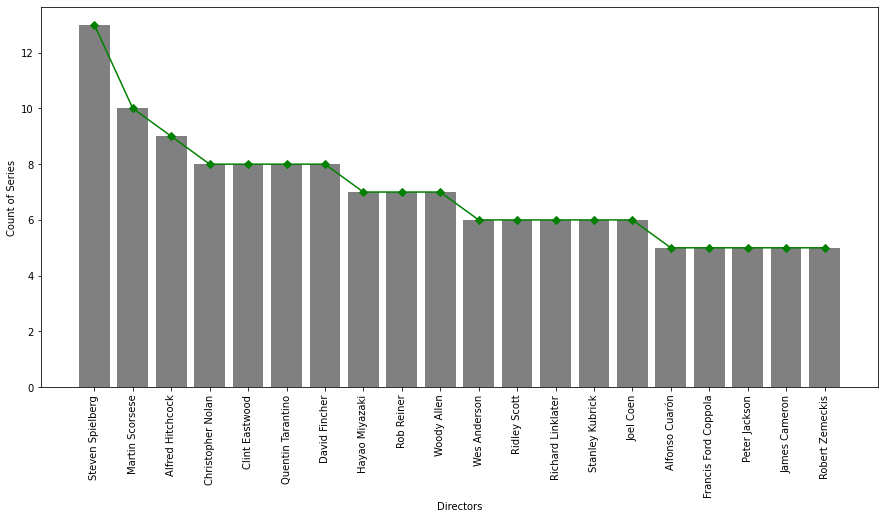

In [39]:

plt.figure(figsize=(15,7))
plt.bar(movies_df['Director'].value_counts().head(20).keys(),movies_df['Director'].value_counts().head(20), color='grey')
plt.plot(movies_df['Director'].value_counts().head(20).keys(),movies_df['Director'].value_counts().head(20), color='g', marker="D")
plt.xlabel('Directors')
plt.ylabel('Count of Series')
plt.xticks(rotation=90);

#### Q5- How many movies were released in which year

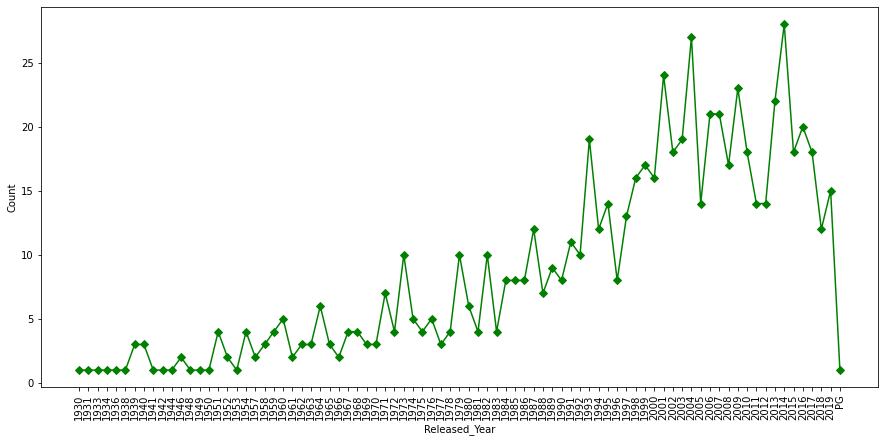

In [59]:
Year_released=movies_df.sort_values('Released_Year', ascending=False)
Released_grp=Year_released.groupby('Released_Year')[['Released_Year']].count()
plt.figure(figsize=(15,7))
plt.plot(Released_grp.index, Released_grp['Released_Year'],color='g', marker="D")
plt.xlabel('Released_Year')
plt.ylabel('Count')
plt.xticks(rotation=90);

### Inference and Conclusion

* There is no relation between the release date and released year
* With the change in Year more and more movies being produced
* Most movies were released in the year 2015-16 this probably might be because as the time changed the resources also increased   that attracted more and more producers to produce more and more movies
* As there is no relation between released year and runtime this ultimately means that runtime do not depend upon the ages         in which the movies are released

#### Reference and future work

This dataset can be used in future in order to understand the movies popularity and their gross in the future as the time will change more and more movies will be added to the dataset and more and more information can be fetched from it.

**References**
* https://www.geeksforgeeks.org/python-pandas-dataframe-plot-bar/